In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from collections import Counter

In [2]:
# Read the dataset
df = pd.read_csv("fake_job_postings.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Check the shape of the dataset
df.shape

(17880, 18)

In [5]:
# Check for missing values in the dataset
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
# Replace specific values with 'Not Specified'
df.fillna('Not Specified',inplace=True)
df=df.replace(['Not Applicable','Unspecified'],'Not Specified')

In [7]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Specified,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Specified,Not Specified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Specified,Not Specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Not Specified,Not Specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,Not Specified,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Not Specified,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,Not Specified,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Not Specified,Not Specified,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,Not Specified,0,0,0,Full-time,Not Specified,Not Specified,Not Specified,Not Specified,0
17878,17879,Graphic Designer,"NG, LA, Lagos",Not Specified,Not Specified,Not Specified,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Specified,Professional,Graphic Design,Design,0


In [8]:
# Extract the country from the location column
def extract_country(location):
    parts = location.split(', ')
    return parts[0]

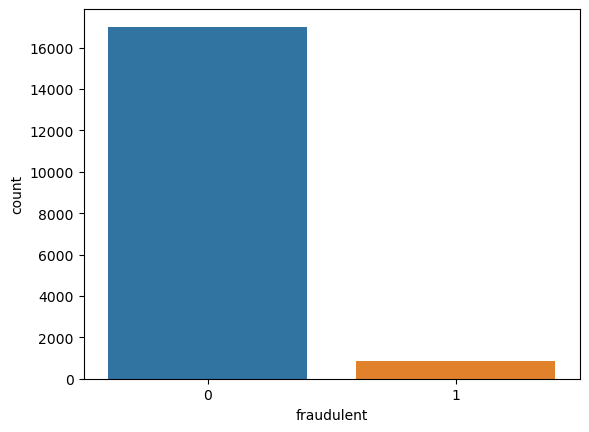

In [9]:
# Count the occurrences of each class in the 'fraudulent' column
sns.countplot(x=df["fraudulent"])

In [10]:
# Apply a custom function to extract the average salary from the salary range
def extract_average_salary(salary_range):
    if salary_range != 'Not Specified':
        # Split the salary range and calculate the average
        parts = salary_range.split('-')
        if len(parts) == 2:
            try:
                min_salary = int(parts[0])
                max_salary = int(parts[1])
                return max_salary
            except ValueError:
                # Handle invalid numeric values
                return 0
        else:
            # Handle unexpected data format
            return 0
    else:
        return 0
# Apply the custom function to create a new 'salary' column
df['salary'] = df['salary_range'].apply(extract_average_salary)

In [11]:
#Replacing the null values with mean
avg_salary=df["salary"].mean()
df["salary"] =df.replace("0", avg_salary)

In [12]:
print(df['salary'].dtype)

object


In [13]:
# converting the datatyype from object to integer
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

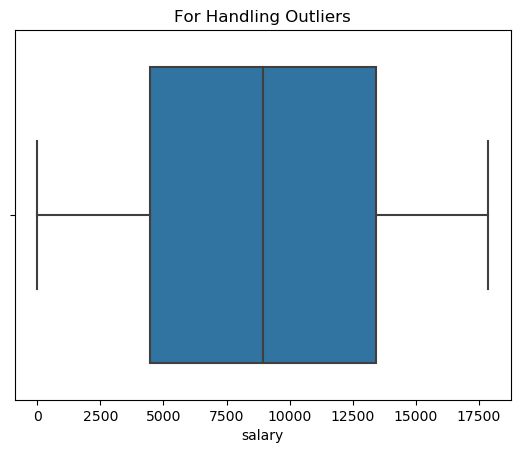

In [14]:
# checking for outliers
plt.title('For Handling Outliers')
sns.boxplot(x="salary",data=df)

In [15]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salary
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Specified,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0,1
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Specified,Not Specified,Marketing and Advertising,Customer Service,0,2
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Specified,Not Specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0,3
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,4
4,5,Bill Review Manager,"US, FL, Fort Worth",Not Specified,Not Specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,Not Specified,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Not Specified,Computer Software,Sales,0,17876
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,Not Specified,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,17877
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Not Specified,Not Specified,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,Not Specified,0,0,0,Full-time,Not Specified,Not Specified,Not Specified,Not Specified,0,17878
17878,17879,Graphic Designer,"NG, LA, Lagos",Not Specified,Not Specified,Not Specified,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Specified,Professional,Graphic Design,Design,0,17879


In [16]:
# Apply a custom function to extract the country from the location
def extract_country(location):
    parts = location.split(', ')
    return parts[0]

In [17]:
#function implementation
df['location'] = df['location'].apply(extract_country)

In [18]:
#creating new dataframe
new_df=df

In [19]:
#Balencing the dataset
df_majority = new_df[new_df.fraudulent == 0]
df_minority = new_df[new_df.fraudulent == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=len(df_minority),    # to match minority class
                                 random_state=42)   # reproducible results

# Reset the indices of the downsampled DataFrame
df_majority_downsampled.reset_index(drop=True, inplace=True)
df_minority.reset_index(drop=True, inplace=True)

# Combine the minority class with the downsampled majority class
new_df = pd.concat([df_majority_downsampled, df_minority])



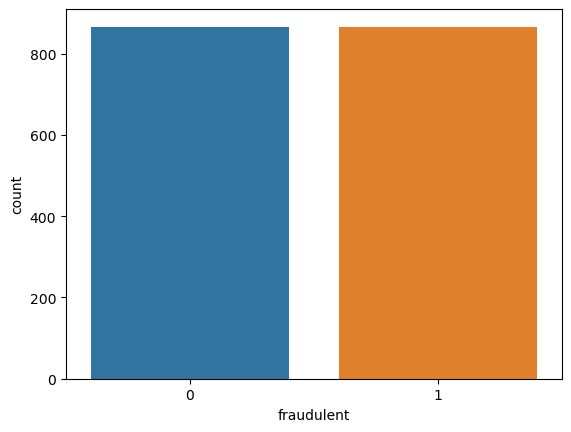

In [20]:
sns.countplot(x=new_df["fraudulent"])

In [21]:
#features extraction
new_df=new_df[["title","salary","location", "company_profile", "description", "requirements", "department","function","benefits","fraudulent"]]

In [22]:
new_df

,title,salary,location,company_profile,description,requirements,department,function,benefits,fraudulent
0,SEM Coordinator,5231,GR,#URL_c379aa631173ed5b7c345ab3f500a9a053e509138...,The right candidate will be responsible for co...,- Previous experience of minimum 3 years...,Not Specified,Not Specified,- Attractive Remuneration Package.- ...,0
1,Senior Data Scientist,14113,GB,"As a growing and successful startup, Conversoc...",Conversocial builds software that helps compan...,Good working knowledge of Python or similar la...,Engineering,Engineering,Salary of £40-55k plus stock options£2k annual...,0
2,Junior Web Marketing Specialist,3169,GR,Η Atnet Communications A.E. είναι μια αμιγώς ε...,Η Atnet Communications αναζητά Junior Web Mark...,Απαιτούμενα προσόντα:Hands-on εμπειρία στην δι...,Web Marketing και Social,Marketing,H θέση αφορά μόνιμη απασχόληση στην περιοχή το...,0
3,New Product Development Project Leader - Full ...,14805,US,We Provide Full Time Permanent Positions for m...,Coordination and project management of New Pro...,"Location - Atlanta, GA, USAJob Type – Permanen...",Not Specified,Management,Not Specified,0
4,Data Intern - Retail & Apparel Analysis,5810,GB,"We build software for fashion retailers, to he...",About EDITDEDITD’s software is the market lead...,Not Specified,Fashion:Internships,Not Specified,Not Specified,0
...,...,...,...,...,...,...,...,...,...,...
861,Student Positions Part-Time and Full-Time.,17828,US,Not Specified,Student Positions Part-Time and Full-Time.You ...,Not Specified,Not Specified,Not Specified,Not Specified,1
862,Sales Associate,17829,AU,Not Specified,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Sales and Marketing,Not Specified,Who We Are We are a Global Leadership Developm...,1
863,Android Developer,17830,PL,Not Specified,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,Not Specified,Not Specified,attractive salary (adequate to the candidate s...,1
864,Payroll Clerk,17831,US,Not Specified,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,Not Specified,Accounting/Auditing,We offer a competitive salary and benefits pac...,1


In [23]:
# Split the data into independent and dependent variables
x=new_df[["title","salary","location", "department","function"]]
y=new_df["fraudulent"]

# Define preprocessing for the textual data (title and location)
textual_preprocessor = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),  # Convert text data to a matrix of TF-IDF features
])

# Define preprocessing for the categorical data (function)
categorical_preprocessor = Pipeline(steps=[
    ('onehot', OneHotEncoder())  # One-hot encode the categorical data
])

# Combine preprocessing for textual and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('text', textual_preprocessor, 'title'),  # Apply the textual_preprocessor to the 'title' column
        ('cat', categorical_preprocessor, ['location', 'department','function'])  # Apply the categorical_preprocessor to the 'location' and 'function' columns
    ])

# Create a preprocessed data transformer
preprocessed_data = preprocessor.fit_transform(x)

# Split the preprocessed data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(preprocessed_data, y, test_size=0.2, random_state=15)

# Initialize and fit the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=75)
rf_model.fit(x_train, y_train)

# Initialize and fit the SupportVectorClassifier model
svc_model= SVC()
svc_model.fit(x_train, y_train)

# Initialize and fit the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
# Calculate the accuracy and score for each model
score = rf_model.score(x_test,y_test)
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"RF Accuracy: {accuracy}")
print(f"RF Score:{score}")

RF Accuracy: 0.8472622478386167
RF Score:0.8472622478386167


In [25]:
score = dt_model.score(x_test,y_test)
y_pred = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"DT Accuracy: {accuracy}")
print(f"DT Score:{score}")

DT Accuracy: 0.8328530259365994
DT Score:0.8328530259365994


In [26]:
score = svc_model.score(x_test,y_test)
y_pred = svc_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVC Accuracy: {accuracy}")
print(f"SVC Score:{score}")

SVC Accuracy: 0.8386167146974063
SVC Score:0.8386167146974063


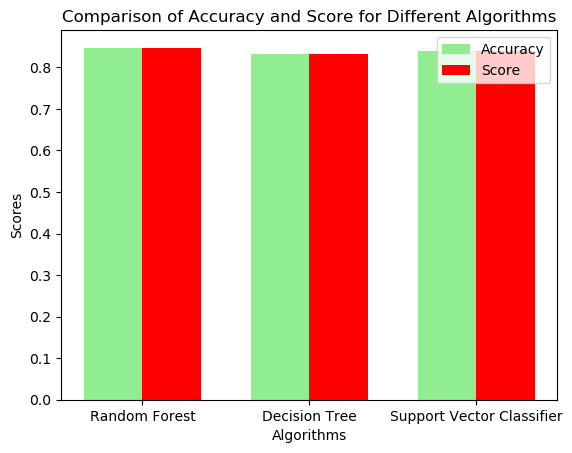

In [27]:
# Plot a comparison graph for accuracy and score of different algorithms
# Initialize lists to store accuracy and score values
algorithms = ['Random Forest', 'Decision Tree', 'Support Vector Classifier']
accuracies = [rf_model.score(x_test, y_test), dt_model.score(x_test, y_test), svc_model.score(x_test, y_test)]
scores = [accuracy_score(y_test, rf_model.predict(x_test)), accuracy_score(y_test, dt_model.predict(x_test)), accuracy_score(y_test, svc_model.predict(x_test))]

# Plotting the results
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(algorithms))

rects1 = ax.bar(index, accuracies, bar_width, label='Accuracy', color='lightgreen')
rects2 = ax.bar([i + bar_width for i in index], scores, bar_width, label='Score', color='red')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy and Score for Different Algorithms')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(algorithms)
ax.legend()

plt.show()
